# PHASE 2: Similarity & Dimensionality Reduction

In [5]:
# Total imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import euclidean, cosine
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [6]:
# Load data
df = pd.read_csv('all_products.csv')
print(f"Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head(10)

Loaded: 4702 rows, 15 columns


,name,brand,price_rub,price_kzt,seller,seller_id,seller_rating,seller_total_sold,seller_age_months,feedbacks,category,source_file,risk_level,publication_date,first_review_datetime
0,Умный тренажёр для ног бедер ягодиц,Q,846.0,5076,ВсёМаркет,250046174.0,4.3,0,28,0,тренажеры,wb_fitnes.csv,medium,2024-07-03,2024-07-10
1,Тренажер для спины и поясницы,NaN,430.0,2580,Sheikh,250001281.0,4.6,0,12,0,тренажеры,wb_fitnes.csv,low,2025-04-26,2025-05-06
2,Универсальный тренажёр Эспандер,АТМ95,798.0,4788,MERI,250079034.0,4.7,0,22,0,тренажеры,wb_fitnes.csv,low,2025-05-07,2025-05-24
3,Степпер тренажер для ног бедер и ягодиц с эспа...,EnergyFit,5008.0,30048,EnergyFit,4413375.0,4.9,58776,35,5937,тренажеры,wb_fitnes.csv,low,2023-09-25,2023-10-11
4,Металлический диск для коррекции фигуры,NaN,612.0,3672,BRB SHOP,250075919.0,4.7,0,18,0,диски для скольжения,wb_fitnes.csv,low,2025-04-30,2025-05-13
5,"Набор фитнес резинок, ленточный тренажер от 3-...",AleksTeam,959.0,5754,AleksTeam,1358048.0,4.6,0,38,0,тренажеры,wb_fitnes.csv,low,2024-09-10,2024-09-16
6,Тренажер степпер для дома,NaN,3214.0,19284,AGEEVA,3958712.0,4.6,0,47,0,тренажеры,wb_fitnes.csv,low,2024-08-04,2024-08-07
7,Виброплатформа Shake Black фитнес тренажер плю...,GESS,7041.0,42246,REAL PRICE,250076008.0,4.7,0,42,0,тренажеры,wb_fitnes.csv,low,2023-08-09,2023-08-13
8,Фитнес твистер с резинками тренажёр для ягодиц...,ATS2,990.0,5940,LaraMix,250044203.0,4.5,0,8,0,тренажеры,wb_fitnes.csv,low,2025-06-01,2025-06-11
9,Диск здоровья вращающийся с эспандерами для по...,TIDDO,989.0,5934,Мелочи для дома,250032597.0,4.5,0,13,0,тренажеры,wb_fitnes.csv,low,2025-10-09,2025-10-20


## Task 2.1: Similarity Measures

In [7]:
# Select 2 products for comparison
numeric_cols = ['price_rub', 'seller_rating', 'feedbacks', 'seller_age_months']
df_numeric = df[numeric_cols].dropna()

# Pick 2 random products
idx1, idx2 = df_numeric.sample(2, random_state=42).index 
product1 = df_numeric.loc[idx1].values
product2 = df_numeric.loc[idx2].values

print("Product 1:", product1)
print("Product 2:", product2)
# np.set_printoptions(suppress=True)  # turning-off scientific notation


Product 1: [4470.     4.9   15.    19. ]
Product 2: [1.911e+03 4.900e+00 1.000e+00 3.500e+01]


In [8]:
# 1. Euclidean Distance
eucl_dist = euclidean(product1, product2)
print(f"\n1. Euclidean Distance: {eucl_dist:.4f}")
print("Description: Straight-line distance between two points in n-dimensional space.")
print("Formula: sqrt(sum((x_i - y_i)^2))")
print("Use: Spatial data, clustering, KNN. Sensitive to scale.")


1. Euclidean Distance: 2559.0883
Description: Straight-line distance between two points in n-dimensional space.
Formula: sqrt(sum((x_i - y_i)^2))
Use: Spatial data, clustering, KNN. Sensitive to scale.


In [ ]:
# checking existing of category on 1 product
set1 = set()
set2 = set()
if pd.notna(df.loc[idx1, 'category']):
    set1.add(df.loc[idx1, 'category']) # adding to the set

if pd.notna(df.loc[idx2, 'category']):
    set2.add(df.loc[idx2, 'category'])  


if pd.notna(df.loc[idx1, 'brand']):
    set1.add(df.loc[idx1, 'brand'])  
if pd.notna(df.loc[idx2, 'brand']):
    set2.add(df.loc[idx2, 'brand'])  

# Solving union & intersection
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))
jaccard = intersection / union if union > 0 else 0 

print(f"\nJaccard Similarity: {jaccard:.4f}")
print(f"Set 1: {set1}") 
print(f"Set 2: {set2}") 
print(f"Intersection: {intersection}, Union: {union}")
print("Description: Measures overlap between two sets.")  
print("Formula: |A ∩ B| / |A ∪ B|")  
print("Use: Text similarity, recommendation systems, binary features.") 


NameError: name 'set1' is not defined

In [ ]:
# Comparison
print("\n" + "="*60)
print("COMPARISON:")
print("="*60)
print(f"Euclidean: {eucl_dist:.4f} (lower = more similar)")
print(f"Jaccard:   {jaccard:.4f} (higher = more similar)")
print("\nKey Differences:")
print("- Euclidean: Sensitive to scale, measures absolute distance")
print("- Jaccard: For sets/binary data, ignores frequency")
print("\nBest for fraud detection:")
print("- Euclidean: Compare numeric features (price, ratings)")
print("- Jaccard: Compare product categories, brands, sellers, risk levels")



COMPARISON:
Euclidean: 2559.0883 (lower = more similar)
Jaccard:   0.2000 (higher = more similar)

Key Differences:
- Euclidean: Sensitive to scale, measures absolute distance
- Jaccard: For sets/binary data, ignores frequency

Best for fraud detection:
- Euclidean: Compare numeric features (price, ratings)
- Jaccard: Compare product categories, brands, sellers, risk levels


## Task 2.2: PCA Analysis

In [ ]:
# Prepare data for PCA
features = ['price_rub', 'seller_rating', 'seller_total_sold', 'seller_age_months', 'feedbacks']
df_pca = df[features].dropna() # can not work with NaN values like scaler and so on
print(f"PCA dataset: {df_pca.shape}")
print(f"\nOriginal features ({len(features)}):")
print(features)

PCA dataset: (4702, 5)

Original features (5):
['price_rub', 'seller_rating', 'seller_total_sold', 'seller_age_months', 'feedbacks']


In [ ]:
# Step 1: Standardize features
scaler = StandardScaler() # 0 or 1
X_scaled = scaler.fit_transform(df_pca)
print("\nStep 1: Standardization")
print(f"Mean after scaling: {X_scaled.mean(axis=0)}")
print(f"Std after scaling: {X_scaled.std(axis=0)}")
print("Why: PCA is sensitive to scale, standardization ensures all features contribute equally")


Step 1: Standardization
Mean after scaling: [-1.20892001e-17 -8.43221707e-16 -3.02230002e-18 -6.95129006e-17
  0.00000000e+00]
Std after scaling: [1. 1. 1. 1. 1.]
Why: PCA is sensitive to scale, standardization ensures all features contribute equally


In [ ]:
# Step 2: Apply PCA using sklearn (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nStep 2: PCA Transformation")
print(f"Original dimensions: {X_scaled.shape}")
print(f"Reduced dimensions: {X_pca.shape}")
print(f"\nExplained variance ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  Total: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")


Step 2: PCA Transformation
Original dimensions: (4702, 5)
Reduced dimensions: (4702, 2)

Explained variance ratio:
  PC1: 0.4006 (40.06%)
  PC2: 0.2155 (21.55%)
  Total: 0.6162 (61.62%)


In [ ]:
# Component interpretation
components_df = pd.DataFrame(
    pca.components_.T, # making table for each component with 5 caterogy
    columns=['PC1', 'PC2'],
    index=features
)
print("\nPrincipal Components (feature contributions):")
print(components_df)
print("\nInterpretation:")
print("- PC1: Dominated by", components_df['PC1'].abs().idxmax())
print("- PC2: Dominated by", components_df['PC2'].abs().idxmax())


Principal Components (feature contributions):
                        PC1       PC2
price_rub         -0.020394  0.706499
seller_rating      0.051166  0.571950
seller_total_sold  0.706031 -0.009686
seller_age_months  0.002695 -0.416585
feedbacks          0.706031 -0.009765

Interpretation:
- PC1: Dominated by feedbacks
- PC2: Dominated by price_rub


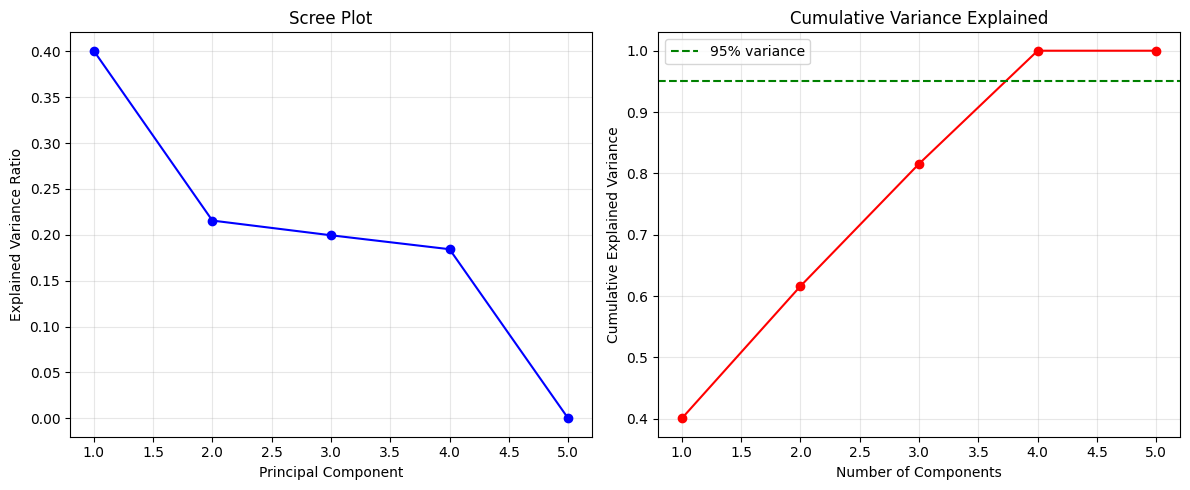

In [ ]:
# Step 5: Visualization
plt.figure(figsize=(12, 5))

# Scree plot --> seeing which components gives more info 
plt.subplot(1, 2, 1)
pca_full = PCA().fit(X_scaled)
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), 
         pca_full.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True, alpha=0.3)

# Cumulative variance --> how many components needs to save for explaining 95% of info
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), 
         np.cumsum(pca_full.explained_variance_ratio_), 'ro-')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

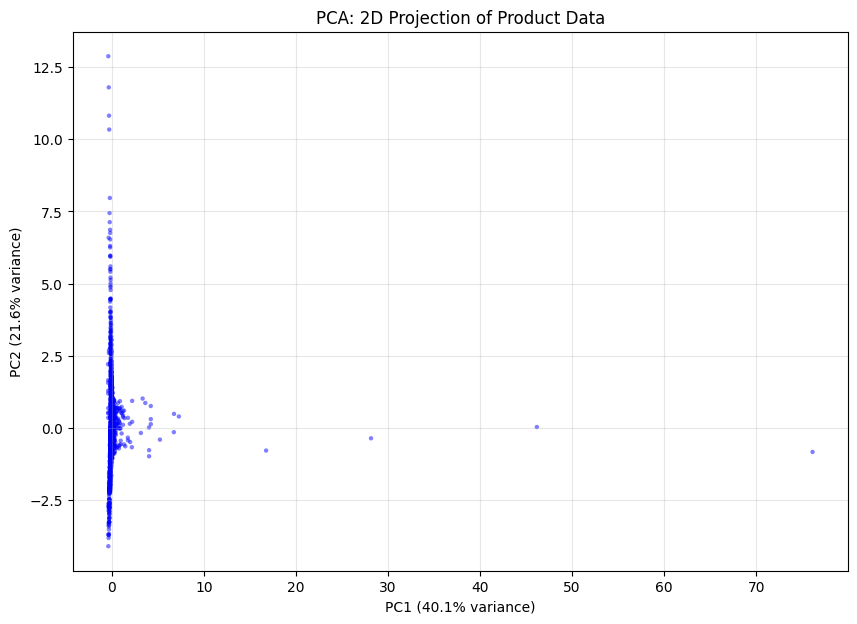


Visualization shows:
- Data distribution in reduced 2D space
- Clusters may indicate product groups with similar characteristics
- Outliers may be suspicious products


In [ ]:
# 2D scatter plot
plt.figure(figsize=(10, 7))

# Sample for visualization (if too many points)
n_samples = min(5000, len(X_pca))
sample_idx = np.random.choice(len(X_pca), n_samples, replace=False)

plt.scatter(X_pca[sample_idx, 0], X_pca[sample_idx, 1], 
           alpha=0.5, s=10, c='blue', edgecolors='none')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('PCA: 2D Projection of Product Data')
plt.grid(True, alpha=0.3)
plt.show()

print("\nVisualization shows:")
print("- Data distribution in reduced 2D space")
print("- Clusters may indicate product groups with similar characteristics")
print("- Outliers may be suspicious products")

In [ ]:
# Compare original vs reduced data
print("\n" + "="*60)
print("COMPARISON: Original vs PCA-Reduced Data")
print("="*60)
print(f"\nOriginal:")
print(f"  Dimensions: {X_scaled.shape}")
print(f"  Storage: {X_scaled.nbytes / 1024:.2f} KB")
print(f"\nPCA-Reduced (2 components):")
print(f"  Dimensions: {X_pca.shape}")
print(f"  Storage: {X_pca.nbytes / 1024:.2f} KB")
print(f"  Compression: {(1 - X_pca.shape[1]/X_scaled.shape[1])*100:.1f}%")
print(f"  Information retained: {pca.explained_variance_ratio_.sum()*100:.1f}%")
print(f"\nBenefits:")
print("  + Reduced dimensionality (5D → 2D)")
print("  + Removes noise and redundancy")
print("  + Faster training for ML models")
print("  + Easy visualization")
print(f"\nTrade-off:")
print(f"  - Lost {(1-pca.explained_variance_ratio_.sum())*100:.1f}% of variance")
print("  - Less interpretable features")


COMPARISON: Original vs PCA-Reduced Data

Original:
  Dimensions: (4702, 5)
  Storage: 183.67 KB

PCA-Reduced (2 components):
  Dimensions: (4702, 2)
  Storage: 73.47 KB
  Compression: 60.0%
  Information retained: 61.6%

Benefits:
  + Reduced dimensionality (5D → 2D)
  + Removes noise and redundancy
  + Faster training for ML models
  + Easy visualization

Trade-off:
  - Lost 38.4% of variance
  - Less interpretable features


## Task 2.3: Baseline ML Models
Note: Since we don't have fraud labels yet, we'll create a proxy target based on suspicious seller characteristics

In [ ]:
# Create proxy fraud label based on suspicious characteristics
df_ml = df[features].dropna()

# Define suspicious sellers:
# - Low rating (< 3.5)
# - New seller (< 6 months)
# - Few sales (< 10)
suspicious = (
    (df_ml['seller_rating'] < 3.5) & 
    (df_ml['seller_age_months'] < 6) & 
    (df_ml['seller_total_sold'] < 10)
)

df_ml['is_suspicious'] = suspicious.astype(int)

X = df_ml[features]
y = df_ml['is_suspicious']

print(f"Dataset: {X.shape}")
print(f"\nClass distribution:")
print(y.value_counts())
print(f"\nSuspicious rate: {y.mean()*100:.2f}%")
print("\nNote: This is a proxy label. Real fraud labels will be created in Phase 3.")

NameError: name 'df' is not defined


⚠️ Too few suspicious samples. Using unsupervised anomaly detection instead.

Isolation Forest Results:
  Anomalies detected: 471 (10.02%)
  Normal samples: 4231 (89.98%)


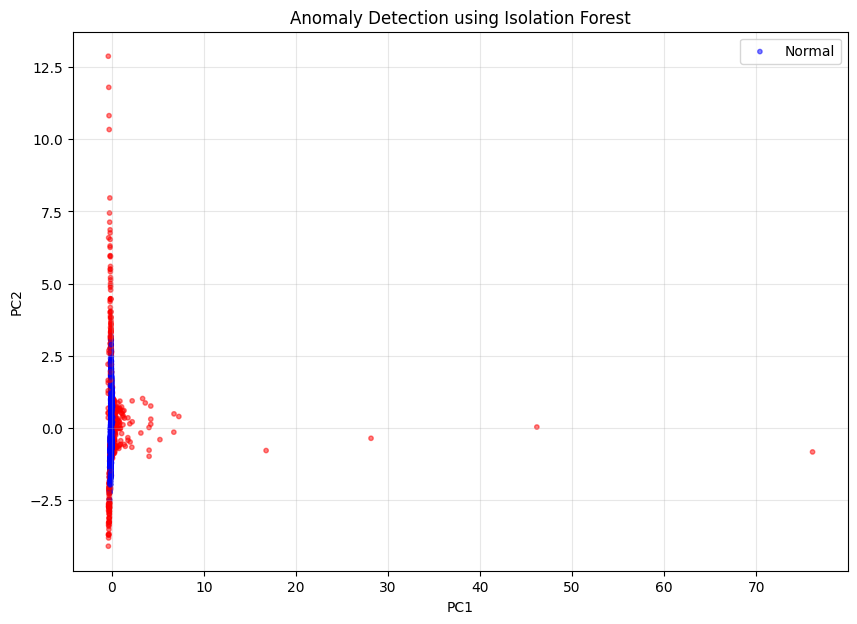


Conclusion:
- Isolation Forest identified potential anomalies (outliers)
- These could be fraudulent products/sellers
- Will be validated in Phase 3 with proper fraud detection models


In [ ]:
# Check if we have enough samples in minority class
if y.sum() < 10:
    print("\n⚠️ Too few suspicious samples. Using unsupervised anomaly detection instead.\n")
    
    # Unsupervised approach: Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    X_scaled_iso = StandardScaler().fit_transform(X)
    predictions = iso_forest.fit_predict(X_scaled_iso)
    
    # -1 = anomaly, 1 = normal
    anomalies = (predictions == -1)
    
    print(f"Isolation Forest Results:")
    print(f"  Anomalies detected: {anomalies.sum()} ({anomalies.mean()*100:.2f}%)")
    print(f"  Normal samples: {(~anomalies).sum()} ({(~anomalies).mean()*100:.2f}%)")
    
    # Visualize anomalies in PCA space
    plt.figure(figsize=(10, 7))
    colors = ['red' if a else 'blue' for a in anomalies]
    
    pca_temp = PCA(n_components=2)
    X_pca_temp = pca_temp.fit_transform(X_scaled_iso)
    
    n_samples = min(5000, len(X_pca_temp))
    sample_idx = np.random.choice(len(X_pca_temp), n_samples, replace=False)
    
    plt.scatter(X_pca_temp[sample_idx, 0], X_pca_temp[sample_idx, 1],
               c=[colors[i] for i in sample_idx], alpha=0.5, s=10)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Anomaly Detection using Isolation Forest')
    plt.legend(['Normal', 'Anomaly'])
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("\nConclusion:")
    print("- Isolation Forest identified potential anomalies (outliers)")
    print("- These could be fraudulent products/sellers")
    print("- Will be validated in Phase 3 with proper fraud detection models")
    
else:
    # Supervised approach if we have enough samples
    print("\nProceding with supervised learning...\n")
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Train set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")

In [ ]:
# Only run if supervised approach is viable
if y.sum() >= 10:
    # Model 1: Logistic Regression
    print("\n" + "="*60)
    print("MODEL 1: Logistic Regression")
    print("="*60)
    print("Description: Linear model for binary classification.")
    print("How it works: Learns linear decision boundary using sigmoid function.")
    print("Best for: Linearly separable data, interpretable coefficients.")
    
    lr = LogisticRegression(random_state=42, max_iter=1000)
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)
    acc_lr = accuracy_score(y_test, y_pred_lr)
    
    print(f"\nAccuracy: {acc_lr:.4f} ({acc_lr*100:.2f}%)")
    
    # Model 2: k-Nearest Neighbors
    print("\n" + "="*60)
    print("MODEL 2: k-Nearest Neighbors (k=5)")
    print("="*60)
    print("Description: Instance-based learning, classifies by majority vote of k neighbors.")
    print("How it works: Finds k closest points using distance metric.")
    print("Best for: Non-linear boundaries, small datasets.")
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    
    print(f"\nAccuracy: {acc_knn:.4f} ({acc_knn*100:.2f}%)")
    
    # Model 3: Decision Tree
    print("\n" + "="*60)
    print("MODEL 3: Decision Tree")
    print("="*60)
    print("Description: Tree-based model that splits data by feature thresholds.")
    print("How it works: Recursively partitions data to maximize information gain.")
    print("Best for: Non-linear data, interpretable rules, handles mixed types.")
    
    dt = DecisionTreeClassifier(random_state=42, max_depth=5)
    dt.fit(X_train_scaled, y_train)
    y_pred_dt = dt.predict(X_test_scaled)
    acc_dt = accuracy_score(y_test, y_pred_dt)
    
    print(f"\nAccuracy: {acc_dt:.4f} ({acc_dt*100:.2f}%)")
    
    # Model 4: SVM
    print("\n" + "="*60)
    print("MODEL 4: Support Vector Machine")
    print("="*60)
    print("Description: Finds optimal hyperplane to separate classes.")
    print("How it works: Maximizes margin between classes using support vectors.")
    print("Best for: High-dimensional data, clear margin of separation.")
    
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    
    print(f"\nAccuracy: {acc_svm:.4f} ({acc_svm*100:.2f}%)")
    
    # Results comparison
    results = pd.DataFrame({
        'Model': ['Logistic Regression', 'KNN (k=5)', 'Decision Tree', 'SVM'],
        'Accuracy': [acc_lr, acc_knn, acc_dt, acc_svm],
        'Accuracy %': [acc_lr*100, acc_knn*100, acc_dt*100, acc_svm*100]
    }).sort_values('Accuracy', ascending=False)
    
    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    print(results.to_string(index=False))
    
    best_model = results.iloc[0]['Model']
    best_acc = results.iloc[0]['Accuracy %']
    print(f"\nBest Model: {best_model} ({best_acc:.2f}%)")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    models = ['Logistic\nRegression', 'KNN\n(k=5)', 'Decision\nTree', 'SVM']
    accuracies = [acc_lr, acc_knn, acc_dt, acc_svm]
    
    bars = plt.bar(models, accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.7)
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison (Proxy Labels)')
    plt.ylim([0, 1.0])
    
    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{acc:.3f}', ha='center', va='bottom')
    
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print("\n⚠️ Important Note:")
    print("These models use PROXY labels (suspicious characteristics).")
    print("Real fraud detection will be done in Phase 3 with proper fraud labels.")

In [ ]:
# Final discussion
print("\n" + "="*60)
print("TASK 3 SUMMARY")
print("="*60)

if y.sum() >= 10:
    print("\nApproach: Supervised learning with proxy labels")
    print(f"Best performing model: {best_model}")
    print("\nLimitations:")
    print("- Proxy labels may not reflect actual fraud")
    print("- Simple rule-based target definition")
    print("- Need actual fraud labels for proper evaluation")
else:
    print("\nApproach: Unsupervised anomaly detection")
    print("Method: Isolation Forest")
    print("\nLimitations:")
    print("- Anomalies ≠ fraud (could be legitimate outliers)")
    print("- No ground truth for validation")
    print("- Need supervised approach with real labels")

print("\nNext Steps (Phase 3):")
print("1. Create proper fraud labels using rule-based logic")
print("2. Train advanced models (Random Forest, XGBoost)")
print("3. Use proper metrics (ROC-AUC, PR-AUC, F1)")
print("4. Handle class imbalance (SMOTE, class weights)")
print("5. Perform clustering to find fraud patterns")


TASK 3 SUMMARY

Approach: Unsupervised anomaly detection
Method: Isolation Forest

Limitations:
- Anomalies ≠ fraud (could be legitimate outliers)
- No ground truth for validation
- Need supervised approach with real labels

Next Steps (Phase 3):
1. Create proper fraud labels using rule-based logic
2. Train advanced models (Random Forest, XGBoost)
3. Use proper metrics (ROC-AUC, PR-AUC, F1)
4. Handle class imbalance (SMOTE, class weights)
5. Perform clustering to find fraud patterns


## Phase 2 Complete ✅
